# Dataload and import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
from sklearn.preprocessing import normalize

In [2]:
## 본인의 디렉토리에 맞게 설정하세요
os.chdir("C:/Users/sora/Tobigs/week1/logistic")

data = pd.read_csv('assignment_2.csv')
data.head()
#data['bias']

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


In [3]:
#data['salary']=data['salary'].apply(lambda x : x/10000)

# Logistic regression 해야하는 data 의 scatter plot

In [4]:
# filter out the applicants that got admitted
MALE = data[data['Label']==1]
FEMALE = data[data['Label'] == 0]
MALE

,Label,bias,experience,salary
0,1,1,0.7,48000
2,1,1,2.5,60000
8,1,1,8.7,83000
9,1,1,10.0,83000
12,1,1,10.0,79000
21,1,1,6.4,63000
24,1,1,9.3,90000
25,1,1,5.5,57000
28,1,1,8.2,65000
32,1,1,0.6,46000


C:\Users\sora\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


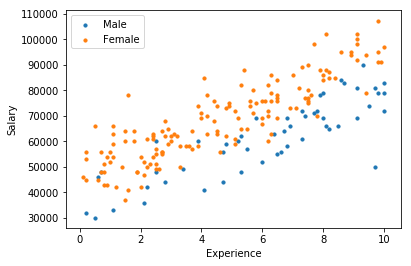

In [5]:
# plots
fig = plt.figure()

plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male')
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.legend()
plt.show()

In [6]:
## 독립변수들
X = data.iloc[:, 1:]

# rescaled_X 
normalized_X = (X[['experience','salary']]-X[['experience','salary']].mean())/X[['experience','salary']].std()
normalized_X['bias'] = X['bias']
cols = normalized_X.columns.tolist()
cols = cols[-1:] + cols[:-1]
normalized_X = normalized_X[cols]
normalized_X = normalized_X.values.tolist()
X= np.array(normalized_X)


#Basic_X
# X = X.values.tolist()
# X = np.array(X)
#X

# 종속변수 Target = T 
T = data['Label']
T = T.values.tolist()
T = np.array(T)
#T

# 회귀계수
beta = np.random.randn(3)
#beta= np.array([1,1,1])
#beta

## 회귀식
## $$ a_n=B^TX = \hat{B}_0 +\hat{B}_1x_1 +\hat{B}_2x_2 ,    \quad\mbox{n=데이터 수}$$




In [7]:
# 내적 -> 회귀계수와 X의 선형결합 
beta
a = X.dot(beta)
a
#200개의 회귀식이 나옴.
a.shape

(200,)

## $$ \mbox 로그오즈 = 회귀식을\  p에\  대해서\  정리 $$
## $$ log(Odds) = \hat{B}_0 +\hat{B}_1x_1 + \hat{B}_2x_2 $$
## $$ \mbox P는 \ 로지스틱 \ 함수 $$
## $$ P = \frac{\mathrm{1} }{\mathrm{1} + e^{-a_n}} = \sigma(x,B) $$ 

In [8]:
'''
함수를 구현하세요  (시그모이드)
INPUT: 회귀식(a)
Output: P
'''

p=1/(1+np.exp(-a))
p


array([0.4249076 , 0.42270301, 0.45037874, 0.45446027, 0.48265904,
       0.46469918, 0.47984176, 0.50796677, 0.49464535, 0.49220069,
       0.4128523 , 0.4516827 , 0.48245223, 0.48247119, 0.42839188,
       0.51583635, 0.48059924, 0.4671329 , 0.44352312, 0.46078396,
       0.4798544 , 0.45035994, 0.49690852, 0.44406775, 0.51058638,
       0.43758336, 0.54014265, 0.43612137, 0.45183768, 0.49860123,
       0.55092921, 0.46136366, 0.42033052, 0.42472377, 0.49727201,
       0.41795554, 0.38302104, 0.51190862, 0.42160187, 0.48341051,
       0.48246487, 0.44036882, 0.4249076 , 0.40976163, 0.38817788,
       0.43666404, 0.41157017, 0.48452521, 0.46024838, 0.48621019,
       0.44036882, 0.42469903, 0.43684912, 0.42875418, 0.47105494,
       0.46173131, 0.38888681, 0.45428003, 0.47424278, 0.45298104,
       0.47740747, 0.48788916, 0.45390704, 0.50834284, 0.40811279,
       0.43833657, 0.40667807, 0.45221666, 0.45668062, 0.48396152,
       0.54201079, 0.41647366, 0.45369546, 0.44500909, 0.46563

## $$ \mbox 각\  데이터가\  따르는\  확률분포를\   label\  y와\  엮어서\  표현  $$

## $$ P(x_i,y_i | B) = \begin{cases} \sigma(x,B)^{y}, & \mbox{if }y\mbox{ = 1} \\ (1-\sigma(x,B))^{1-y}, & \mbox{if }y\mbox{ = 0} \end{cases} $$

## $$ \mbox 위의 \ 확률분포를 \ 따르는 \   데이터에서 \ 얻은 \ Likelihood  $$

## $$ L = \sigma(x,B)^{y}(1-\sigma(x,B))^{1-y} $$ 

## $$ \mbox log 변환  $$

## $$ L^*=log(L) = y\sigma(x,B) + (1-y)(1-\sigma(x,B)) $$ 

## $$ \mbox Convex\  function으로\  만들기\  위한 \ (-) 곱   $$

## $$ \mbox J는\ Loss\ Function  $$

## $$ J= - L^* $$

## $$ \mbox Loss\ function \ = \ Negative\ log \ likelihood\  $$

## $$ \mbox N개의 \ 데이터에\ 대한\ Negative\ Likelihood  $$
## $$ J(x_i,y_i|B) = -\sum_{i=1}^N y_i\sigma(x_i,B)- \sum_{i=1}^N(1-y_i)(1-\sigma(x_i,B)) $$ 


In [9]:
'''
Negative_Likelihood를 구현하세요
INPUT: P, Y(LABEL)
OUTPUT : 각 데이터들의 Negative_Likelihood 값의 합

'''

y=data['Label']
#최대우도법

def loss(p):
    j=-y*np.log(p)-(1-y)*np.log(1-p)
    return sum(j)



In [10]:
LL=loss(p)

In [11]:
LL

135.40418096483765

## Loss function 에 대한 Gradient를 구하기 위한 작업 

## $$ \mbox J를 \ B에 \ 대해서\ 편미분  $$

## $$ \mbox J는 \ P에 \ 대한\ 함수이고, \ P는 \ a에 \ 대한 \ 함수이고,\ a는\ B에 \ 대한\ 함수  $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} $$ 

## $${\partial J\over\partial P_i} = \frac{y_i}{P_i}- \frac{1-y_i}{1-P_i} ,\quad {\partial P_i\over\partial a_i} = P_i(1-P_i), \quad {\partial a_i\over\partial B}=X^T $$ 

## $$ \mbox 또한 \ B는 \ B_0,\ B_1,\ B_2이\  있어서\ 각각\ 편미분    $$
## $$ \mbox 간단하게 \  표현하면   $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} = - X^T(y-P) =  X^T(P-y)$$ 

In [12]:
# 데이터 정규화 
M_normalized_X = (MALE[['experience','salary']]-MALE[['experience','salary']].mean())/MALE[['experience','salary']].std()
M_normalized_X['bias'] = MALE['bias']
cols = M_normalized_X.columns.tolist()
cols = cols[-1:] + cols[:-1]
M_normalized_X = M_normalized_X[cols]
M_normalized_X = M_normalized_X.values.tolist()
M_X= np.array(M_normalized_X)

F_normalized_X = (FEMALE[['experience','salary']]-FEMALE[['experience','salary']].mean())/FEMALE[['experience','salary']].std()
F_normalized_X['bias'] = FEMALE['bias']
cols = F_normalized_X.columns.tolist()
cols = cols[-1:] + cols[:-1]
F_normalized_X = F_normalized_X[cols]
F_normalized_X = F_normalized_X.values.tolist()
F_X= np.array(F_normalized_X)

print(M_X)
type(F_X)

[[ 1.         -1.90729841 -0.91475975]
 [ 1.         -1.27847442 -0.10510006]
 [ 1.          0.88747488  1.44674769]
 [ 1.          1.34162554  1.44674769]
 [ 1.          1.34162554  1.17686113]
 [ 1.          0.08397756  0.09731487]
 [ 1.          1.09708288  1.91904918]
 [ 1.         -0.23043443 -0.30751498]
 [ 1.          0.71280155  0.23225815]
 [ 1.         -1.94223307 -1.04970303]
 [ 1.          0.85254022  1.51421933]
 [ 1.         -1.97716774 -2.1292493 ]
 [ 1.         -1.27847442 -0.91475975]
 [ 1.         -2.08197174 -1.99430601]
 [ 1.         -0.50991176 -0.37498662]
 [ 1.         -1.17367042 -1.18464632]
 [ 1.          0.64293222  1.17686113]
 [ 1.         -0.0557611  -0.64487319]
 [ 1.         -1.76755974 -1.92683437]
 [ 1.          1.23682154  1.31180441]
 [ 1.         -0.50991176 -1.18464632]
 [ 1.          0.18878156  0.16478651]
 [ 1.          0.25865089  0.29972979]
 [ 1.          0.60799755  1.10938949]
 [ 1.         -0.30030376 -0.91475975]
 [ 1.          0.81760555

numpy.ndarray

추정된 회귀 계수 B0,B10,B2
[-1.84341435  3.75343014 -3.64637097]


C:\Users\sora\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


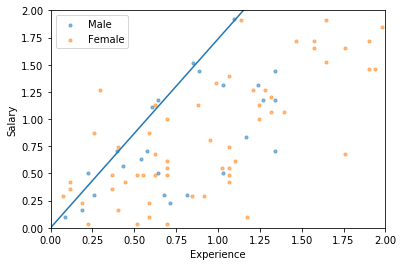

In [13]:
'''
위에서 구한 Negative Likelihood 함수를 각각 베타에 편미분하여 Gradient를 계산하고
Learning_rate와 곱하여 회귀계수를 업데이트 해주세요.
회귀계수가 업데이트 될 때 마다, P도 다시 업데이트 되야 합니다. 
'''
# 회귀계수
beta = np.random.randn(3)

# 1000번 반복한다. (1000번의 시도를 통해 적절한 회귀 계수 구함.
for i in range(0,1000):
    
    #회귀식 
    a = X.dot(beta)
    #회귀식 바탕 시그모이드 함수 정의
    p=1/(1+np.exp(-a))
    #확률을이용한 최대우도 함수
    gradient=(X.T.dot(p-y))
    gradient
    #현재 기울기에서, update된 기울기곱해서 갱신
    #running rate 을 0.001로 지정
    beta=beta-0.001*np.array(gradient)
    
    
print("추정된 회귀 계수 B0,B10,B2")
print(beta)
'''추정된 회귀계수가 beta=[B0,B2,B3]이라면, 다음 코드를 통해 시각화가 가능합니다'''


#print(M_X[:, 2])
#print(M_X)
fig = plt.figure()
# Experience , Salary
plt.scatter(M_X[:, 1], M_X[:, 2], s=10, label='Male',alpha=0.5)
plt.scatter(F_X[:, 1], F_X[:, 2], s=10, label='Female',alpha=0.5)
#plt.scatter(X[:,1], X[:,2],c=T , s=10, alpha=0.8)
#50개의 데이터 임의로 생성
x_axis = np.linspace(0, 10,50)

#추정된 회귀식 그려주기.

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
#추정된 회귀직선 그리기 
plt.plot(x_axis,-x_axis*(beta[0]+beta[1]+beta[2]))
plt.xlim(0,2)
plt.ylim(0,2)
plt.legend()
plt.show()




<h4> 직접 구현을 한 rough한 GD이기 때문에 성능이 안좋을 수 있습니다
<h4>초기값에 매우 민감하며, 기타 하이퍼 파라미터에 따라 성능이 달라집니다

## 결과)
Gradient descent method를 통해 로지스틱 함수를 최적화 시켜 보았다.<br>
먼저, 명목형 종속변수에 대한 분석이기 때문에 로지스틱 모델을 선택하였고, 모수를 추정하는 과정에서 최대우도방법을 사용하였다.<br>
임으로 생성한 beta 값으로 로짓 함수를 이용해 확률값을 정의하고, loss function으로 Negative Likelihood 사용하고 loss를 최소화 하는 방향(세 모수에 대한 우도함수의 편미분 )으로 추정된 beta값을 새로 정의하였다.<br>
같은  과정을 1000번 반복하고, running rate을 0.001로 주었다.<br>

추정된 회귀직선에 의해 Male과 Female 이 명확하게 분류 되진 않지만, 초기값과 하이퍼 파라미터 값을 지정해주면 성능이 좋아 질 수도 있을 것 같다. 